In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import re

In [2]:
df_land = pd.read_csv("Land_Improvements.csv")
df_property = pd.read_csv("property_features.csv")
df_location = pd.read_csv("location.csv")

In [3]:
df_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1000000 non-null  int64  
 1   cat3_slug     999999 non-null   object 
 2   Land          990897 non-null   float64
 3   Improvements  1000000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 30.5+ MB


In [4]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1000000 non-null  int64  
 1   cat3_slug      999999 non-null   object 
 2   has_parking    1000000 non-null  float64
 3   diff_age       1000000 non-null  float64
 4   has_warehouse  1000000 non-null  float64
 5   has_elevator   999911 non-null   float64
 6   rooms_count    1000000 non-null  float64
 7   floor          1000000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 61.0+ MB


In [5]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Unnamed: 0         1000000 non-null  int64 
 1   cat3_slug          999999 non-null   object
 2   city_slug          999998 non-null   object
 3   neighborhood_slug  999998 non-null   object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [6]:
df_merged = df_location.merge(df_land.drop(columns=["cat3_slug"], errors='ignore'), on="Unnamed: 0", how="left")
df_merged = df_merged.merge(df_property.drop(columns=["cat3_slug"], errors='ignore'), on="Unnamed: 0", how="left")

cols_order = ["Unnamed: 0", "cat3_slug", "city_slug", "neighborhood_slug", "Land", "Improvements",
              "has_parking", "diff_age", "has_warehouse", "has_elevator", "rooms_count", "floor"]

df_merged = df_merged[cols_order]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1000000 non-null  int64  
 1   cat3_slug          999999 non-null   object 
 2   city_slug          999998 non-null   object 
 3   neighborhood_slug  999998 non-null   object 
 4   Land               990897 non-null   float64
 5   Improvements       1000000 non-null  float64
 6   has_parking        1000000 non-null  float64
 7   diff_age           1000000 non-null  float64
 8   has_warehouse      1000000 non-null  float64
 9   has_elevator       999911 non-null   float64
 10  rooms_count        1000000 non-null  float64
 11  floor              1000000 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 91.6+ MB


In [7]:
train_df = pd.read_csv("useful_data.csv")

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1000000 non-null  int64  
 1   cat3_slug          999999 non-null   object 
 2   city_slug          999998 non-null   object 
 3   neighborhood_slug  999998 non-null   object 
 4   Land               990897 non-null   float64
 5   Improvements       1000000 non-null  float64
 6   has_parking        1000000 non-null  float64
 7   diff_age           1000000 non-null  float64
 8   has_warehouse      1000000 non-null  float64
 9   has_elevator       999911 non-null   float64
 10  rooms_count        1000000 non-null  float64
 11  floor              1000000 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 91.6+ MB


In [9]:
train_df.describe()

,Unnamed: 0,Land,Improvements,has_parking,diff_age,has_warehouse,has_elevator,rooms_count,floor
count,1000000.000000,9.908970e+05,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,999911.000000,1000000.000000,1000000.000000
mean,499999.500000,4.745514e+03,6.122153e+02,0.314522,19.316453,0.366769,-0.084248,1.437032,1.754085
std,288675.278932,2.447160e+05,5.064039e+04,0.851328,12.153592,0.829599,0.903290,1.365548,2.141730
min,0.000000,1.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.000000
25%,249999.750000,7.500000e+01,0.000000e+00,-1.000000,10.000000,0.000000,-1.000000,1.000000,1.000000
50%,499999.500000,1.100000e+02,0.000000e+00,1.000000,23.000000,1.000000,0.000000,2.000000,1.000000
75%,749999.250000,2.000000e+02,0.000000e+00,1.000000,30.000000,1.000000,1.000000,2.000000,3.000000
max,999999.000000,2.000000e+08,1.000000e+07,1.000000,33.000000,1.000000,1.000000,5.000000,180.000000


### Outlier handling

In [10]:
train_df["log_Land"] = np.log(train_df["Land"])

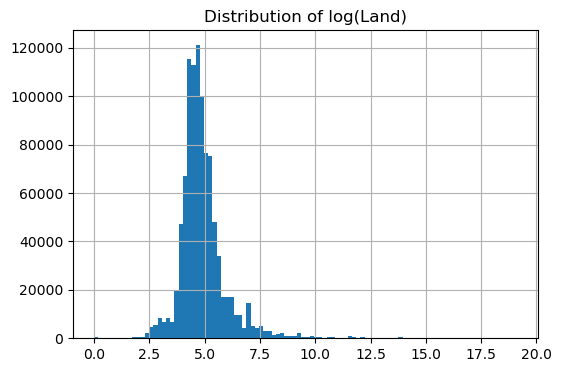

In [11]:
plt.figure(figsize=(6,4))
train_df["log_Land"].hist(bins=100)
plt.title("Distribution of log(Land)")
plt.show()

In [12]:
Q1 = train_df["log_Land"].quantile(0.25)
Q3 = train_df["log_Land"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df["log_Land"] >= lower_bound) & (train_df["log_Land"] <= upper_bound)]

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919418 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         919418 non-null  int64  
 1   cat3_slug          919418 non-null  object 
 2   city_slug          919418 non-null  object 
 3   neighborhood_slug  919418 non-null  object 
 4   Land               919418 non-null  float64
 5   Improvements       919418 non-null  float64
 6   has_parking        919418 non-null  float64
 7   diff_age           919418 non-null  float64
 8   has_warehouse      919418 non-null  float64
 9   has_elevator       919417 non-null  float64
 10  rooms_count        919418 non-null  float64
 11  floor              919418 non-null  float64
 12  log_Land           919418 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 98.2+ MB


In [14]:
train_df.to_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\cleaned_property_features.csv", index=False)